<a href="https://colab.research.google.com/github/Munniz1309/prev_bitcoin_RNN/blob/main/prev_bitcoin_rnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%***********************]  1 of 1 completed

Epoch 1/10



/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


90/90 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0621 - val_loss: 0.0025
Epoch 2/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - loss: 3.1809e-04 - val_loss: 0.0024
Epoch 3/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 2.7459e-04 - val_loss: 0.0016
Epoch 4/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 2.4497e-04 - val_loss: 0.0010
Epoch 5/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 2.0727e-04 - val_loss: 9.8612e-04
Epoch 6/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 1.7927e-04 - val_loss: 0.0013
Epoch 7/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 1.9515e-04 - val_loss: 0.0025
Epoch 8/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 2.0858e-04 - val_loss: 0.0010
Epoch 9/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 1.6731e-04 - val_loss: 6.8333e-04
Epoch 10/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 1.3553e-04 - val_loss: 6.4526e-04
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step
Mean Squared Error (MSE): 6301157.539302324
R²: 0.9837936786386932


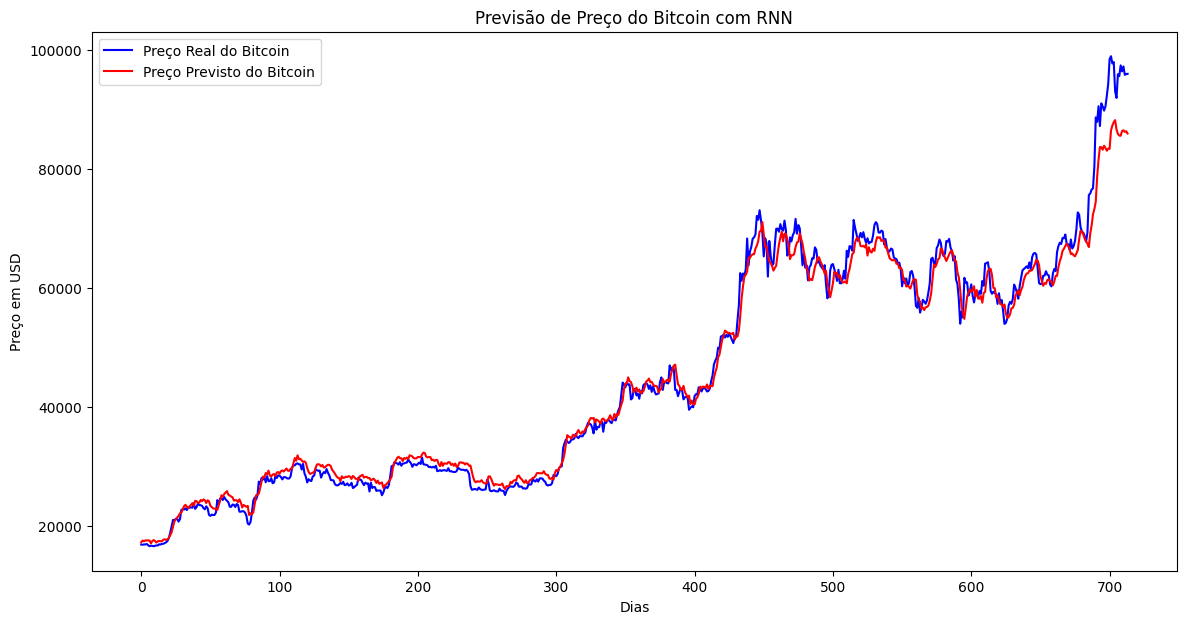

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━

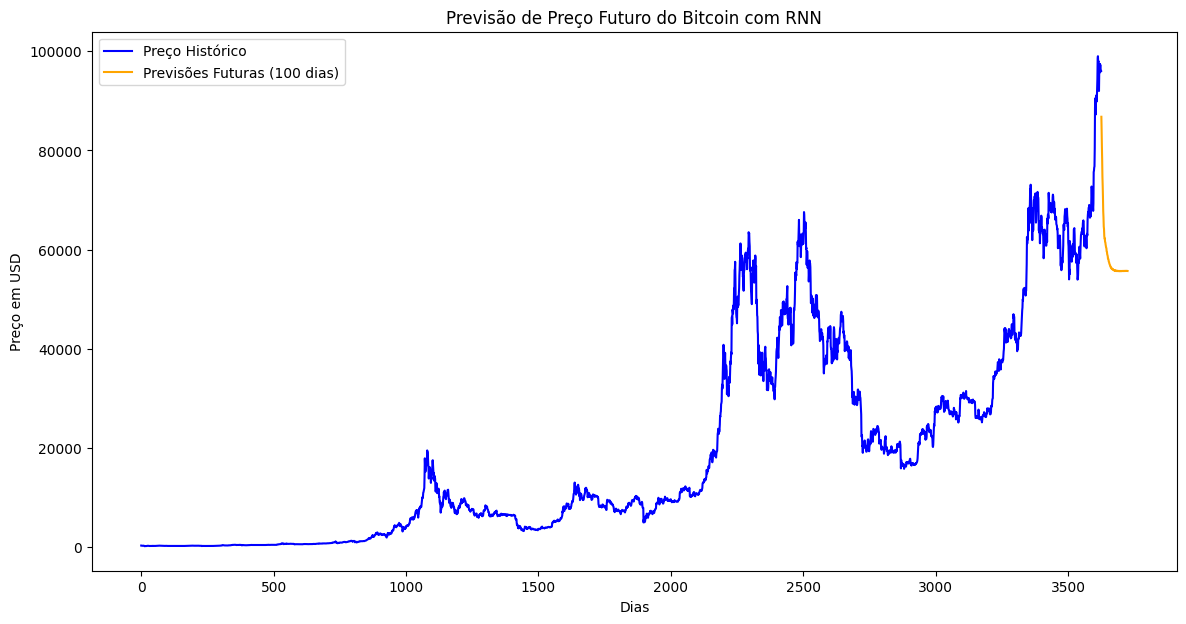

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
import yfinance as yf

# Carregar os dados históricos do Bitcoin
data = yf.download('BTC-USD', start='2015-01-01', end='2024-12-31')
data = data[['Close']]  # Usando apenas o preço de fechamento

# Normalização dos dados
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Função para criar os dados de treinamento
def create_dataset(data, time_step):
    X, y = [], []
    for i in range(time_step, len(data)):
        X.append(data[i-time_step:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

# Criar os dados de treinamento e teste
time_step = 60
X, y = create_dataset(scaled_data, time_step)

# Dividir em dados de treino e teste (80% para treino, 20% para teste)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshape para o formato esperado pela RNN: (samples, time_step, features)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Criar o modelo RNN
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    tf.keras.layers.SimpleRNN(units=50, return_sequences=False),
    tf.keras.layers.Dense(units=1)  # Camada de saída com um único valor (preço do Bitcoin)
])

# Compilar o modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Treinamento do modelo
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Prever e reverter a normalização
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

# Reverter a normalização dos dados reais
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calcular o R² e o MSE
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Exibir os resultados das métricas
print(f'Mean Squared Error (MSE): {mse}')
print(f'R²: {r2}')

# Visualizar os resultados
plt.figure(figsize=(14, 7))
plt.plot(y_test, color='blue', label='Preço Real do Bitcoin')
plt.plot(predictions, color='red', label='Preço Previsto do Bitcoin')
plt.title('Previsão de Preço do Bitcoin com RNN')
plt.xlabel('Dias')
plt.ylabel('Preço em USD')
plt.legend()
plt.show()

# Função para prever os próximos n dias
def predict_future(model, scaled_data, time_step, scaler, future_days):
    input_data = scaled_data[-time_step:]  # Pegar os últimos 'time_step' dias como base
    future_predictions = []

    for _ in range(future_days):
        # Preparar dados de entrada no formato esperado pela RNN
        input_reshaped = input_data.reshape(1, time_step, 1)

        # Previsão para o próximo dia
        next_prediction = model.predict(input_reshaped)

        # Adicionar a previsão à lista
        future_predictions.append(next_prediction[0, 0])

        # Atualizar os dados de entrada
        input_data = np.append(input_data, next_prediction)[-time_step:]

    # Reverter a escala das previsões para valores reais
    future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

    return future_predictions

# Prever os próximos 100 dias
future_days = 100
future_predictions = predict_future(model, scaled_data, time_step, scaler, future_days)

# Criar eixo de tempo para visualização
historical_dates = range(len(data))  # Índices para os dados históricos
future_dates = range(len(data), len(data) + future_days)  # Índices para previsões futuras

# Visualizar resultados
plt.figure(figsize=(14, 7))
plt.plot(historical_dates, data['Close'], label='Preço Histórico', color='blue')
plt.plot(future_dates, future_predictions, label='Previsões Futuras (100 dias)', color='orange')
plt.title('Previsão de Preço Futuro do Bitcoin com RNN')
plt.xlabel('Dias')
plt.ylabel('Preço em USD')
plt.legend()
plt.show()